In [1]:
#pip install lime
from sklearn.cluster import KMeans
from scipy.sparse import csr_matrix
from sklearn.utils.extmath import randomized_svd

In [2]:
### for data
#import json
import pandas as pd
import numpy as np
import collections
### for plotting
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
#%matplotlib inline
import sys
import seaborn as sns
### for processing
import re
import nltk
### for bag-of-words
from sklearn import feature_extraction, model_selection, naive_bayes, pipeline, manifold, preprocessing
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import GridSearchCV
### for explainer
from lime import lime_text
### for word embedding
import gensim
import gensim.downloader as gensim_api
from pprint import pprint
### for deep learning
#from tensorflow.keras import models, layers, preprocessing as kprocessing
#from tensorflow.keras import backend as K
### for bert language model
#import transformers

/Users/Lukre/anaconda3/lib/python3.7/site-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


tip matrice za unos u modele:  
&emsp;&emsp;scipy.sparse.csr.csr_matrix

In [3]:
document = pd.read_csv("/Users/Lukre/Desktop/D_dipl/qa06_all.csv")
document = document.rename(columns={'qa06id': 'id', 'qa06name':'title', 'qa06wher':'location','qa06dsc':'report'})
document_risk = pd.read_csv("/Users/Lukre/Desktop/D_dipl/qa06_only_having_risk_valuesl.csv")
document_risk = document_risk.rename(columns={'qa06id': 'id', 'qa06name':'title', 'qa06wher':'location','qa06dsc':'report','ty26colo':'label','ty26fakt':'factor'})

/Users/Lukre/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
doc_risk_str=pd.read_csv('/Users/Lukre/Desktop/D_dipl/doc_risk_str.csv',index_col=0)
doc_risk_tok=pd.read_csv('/Users/Lukre/Desktop/D_dipl/doc_risk_tok.csv',index_col=0)
for i in range(len(doc_risk_tok)):
    doc_risk_tok.report[i]=str(doc_risk_str.report[i]).split()

doc_no_risk_str=pd.read_csv('/Users/Lukre/Desktop/D_dipl/doc_no_risk_str.csv',index_col=0)
doc_no_risk_tok=pd.read_csv('/Users/Lukre/Desktop/D_dipl/doc_no_risk_tok.csv',index_col=0)
for i in range(len(doc_no_risk_tok)):
    doc_no_risk_tok.report[i]=str(doc_no_risk_str.report[i]).split()

#pdoc_risk=pd.read_csv('/Users/Lukre/Desktop/D_dipl/pdoc_risk.csv',index_col=0)
tokens_risk=pd.read_csv('/Users/Lukre/Desktop/D_dipl/tokens_risk.csv',index_col=0)
#pdoc_no_risk=pd.read_csv('/Users/Lukre/Desktop/D_dipl/pdoc_no_risk.csv',index_col=0)
tokens_no_risk=pd.read_csv('/Users/Lukre/Desktop/D_dipl/tokens_no_risk.csv',index_col=0)
#sparse_risk=pd.read_csv('/Users/Lukre/Desktop/D_dipl/sparse_risk.csv',index_col=0)
sparse_no_risk=pd.read_csv('/Users/Lukre/Desktop/D_dipl/sparse_no_risk.csv',index_col=0)
#pdoc_risk_red=pd.read_csv('/Users/Lukre/Desktop/D_dipl/pdoc_risk_red.csv',index_col=0)
tokens_risk_red=pd.read_csv('/Users/Lukre/Desktop/D_dipl/tokens_risk_red.csv',index_col=0)
ejected_tokens_risk=pd.read_csv('/Users/Lukre/Desktop/D_dipl/ejected_tokens_risk.csv',index_col=0)
#pdoc_no_risk_red=pd.read_csv('/Users/Lukre/Desktop/D_dipl/pdoc_no_risk_red.csv',index_col=0)
tokens_no_risk_red=pd.read_csv('/Users/Lukre/Desktop/D_dipl/tokens_no_risk_red.csv',index_col=0)
ejected_tokens_no_risk=pd.read_csv('/Users/Lukre/Desktop/D_dipl/ejected_tokens_no_risk.csv',index_col=0)
#sparse_risk_red=pd.read_csv('/Users/Lukre/Desktop/D_dipl/sparse_risk_red.csv',index_col=0)
sparse_no_risk_red=pd.read_csv('/Users/Lukre/Desktop/D_dipl/sparse_no_risk_red.csv',index_col=0)

/Users/Lukre/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/Lukre/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/Lukre/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

K-MEANS algorithm    
&emsp;elbow method  
&emsp;algorithm

In [7]:
##tfidf vectorizer + tokeni,bigrami,trigrami
vectorizer_10=TfidfVectorizer(max_features=10000,max_df=0.3,use_idf=True,
                          ngram_range=(1,3))  #max feature 2000, 5000 i 10000
X_10 = vectorizer_10.fit_transform(doc_no_risk_str.report)
#print(X.shape) ## (3358,10000)
terms_10=vectorizer_10.get_feature_names()

vectorizer_2=TfidfVectorizer(max_features=2000,max_df=0.3,use_idf=True,
                          ngram_range=(1,3))  #max feature 2000, 5000 i 10000
X_2 = vectorizer_2.fit_transform(doc_no_risk_str.report)
#print(X.shape) ## (3358,10000)
terms_2=vectorizer_2.get_feature_names()

vectorizer_5=TfidfVectorizer(max_features=5000,max_df=0.3,use_idf=True,
                          ngram_range=(1,3))  #max feature 2000, 5000 i 10000
X_5 = vectorizer_5.fit_transform(doc_no_risk_str.report)
#print(X.shape) ## (3358,10000/2000/5000)
terms_5=vectorizer_5.get_feature_names()

/Users/Lukre/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


nmb of clusters  
verzija: X, sparse_no_risk i sparse_no_risk_red

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


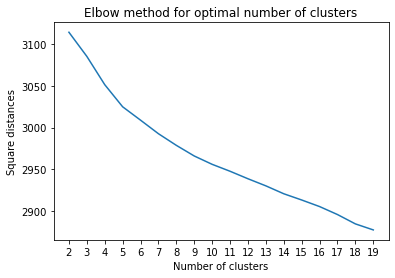

2 -28.942373385588326
3 -33.916378800331586
4 -26.551065562484382
5 -16.04802812164644
6 -16.258883948041785
7 -13.963851162491665
8 -12.753840353636406
9 -10.01674112250248
10 -8.303968578189597
11 -8.996451244206582
12 -8.517410589405245
13 -9.485445358013294
14 -7.463555034887122
15 -7.885056064179935
16 -9.580369961316592
17 -11.206256433647468
18 -7.233720695587181
CPU times: user 2min 46s, sys: 7.71 s, total: 2min 53s
Wall time: 48.5 s


In [31]:
%%time
sum_distance=[]
K=range(2,20)
for k in K:
    print(k)
    #k-means++,max_iter=300,tol=1e-4 i random_state=None su defaultni
    kmeans=KMeans(n_clusters=k, init='k-means++',
                  n_init=20,max_iter=200,tol=1e-8,
                 random_state=42)
    kmeans=kmeans.fit(X) # X,sparse_no_risk i sparse_no_risk_red
    sum_distance.append(kmeans.inertia_)
plt.plot(K,sum_distance)
plt.xlabel('Number of clusters')
plt.xticks(K)
plt.ylabel('Square distances')
plt.title('Elbow method for optimal number of clusters')
plt.show()
for i in K[:-1]: # in range(len(sum_distance)-1)
    print (i,sum_distance[i-K[0]+1]-sum_distance[i-K[0]])

# X - ne daje ok rezultate (ajmo reć 4 klustera)  / 2000 tokena - ništa, 5000 tokena - ništa
# sparse_no_risk - ništa
# sparse_no_risk_red - 16-17 ??

k means

LSA

In [36]:
U, Sigma, Vt = randomized_svd(X_10, n_components=4, n_iter=100,
                              random_state=122)
#printing the concepts
for i, comp in enumerate(Vt):
        terms_comp = zip(terms, comp)
        sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
        print("Concept "+str(i)+": ")
        for t in sorted_terms:
            print(t[0])
        print(" ")

Concept 0: 
mail
air mail
air
slovenije
contain
pošta
pošta slovenije
 
Concept 1: 
approach
ft
speed
runway
landing
perform
normal
 
Concept 2: 
battery
lithium
lithium ion
ion battery
ion
lithium ion battery
device
 
Concept 3: 
bird
strike
damage
bird strike
find
engine
passenger
 


LDA

In [8]:
count_vectorizer_2 = CountVectorizer(analyzer='word', min_df=8,max_features=2000, ngram_range=(1,3))             
xx_2=count_vectorizer_2.fit_transform(doc_no_risk_str.report)

count_vectorizer_5 = CountVectorizer(analyzer='word', min_df=8,max_features=5000, ngram_range=(1,3))             
xx_5=count_vectorizer_5.fit_transform(doc_no_risk_str.report)

count_vectorizer_10 = CountVectorizer(analyzer='word', min_df=8,max_features=10000, ngram_range=(1,3))             
xx_10=count_vectorizer_10.fit_transform(doc_no_risk_str.report)

/Users/Lukre/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Elbow method

2


/Users/Lukre/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


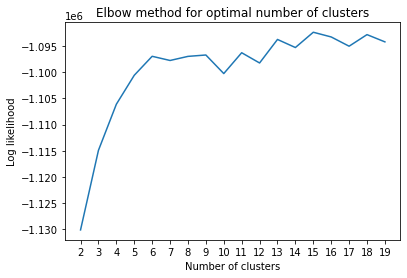

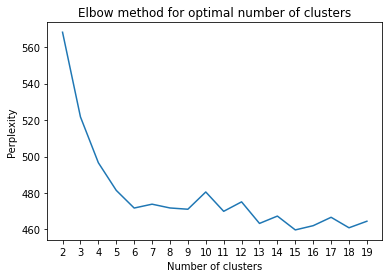

Log likelihood score difference
2 15193.610649514012
3 8805.214424696285
4 5526.836225639097
5 3626.442558612209
6 -798.0767270852812
7 781.8899436413776
8 263.890040749684
9 -3546.4711567522027
10 3978.9558810538147
11 -1956.8682125003543
12 4493.625865631737
13 -1542.7788328265306
14 2918.6674151748884
15 -899.1780214896426
16 -1766.385174735915
17 2211.9103433794808
18 -1384.688479989767
Perplexity score difference
2 -46.44395421681952
3 -25.15783810900365
4 -15.167593720402692
5 -9.699645310623282
6 2.1177058052492725
7 -2.074848162247406
8 -0.6982145414855836
9 9.47043529724533
10 -10.612493019730778
11 5.189657625995608
12 -11.832916846837065
13 4.028953132230981
14 -7.59276315388945
15 2.325923219981121
16 4.603466098780359
17 -5.757382788768609
18 3.5958356300683363


In [12]:
K=range(2,20)
log_likelihood=[]
perplexity=[]
xx=xx_2  # =xx_5 ili xx_10

for k in K:
    print (k)
    lda_model = LatentDirichletAllocation(n_components=k, max_iter=10,learning_method='online',
                                      random_state=42,batch_size=128,evaluate_every = -1,
                                      n_jobs = -1)
    lda_output = lda_model.fit_transform(xx)
    log_likelihood.append(lda_model.score(xx))
    perplexity.append(lda_model.perplexity(xx))
    
plt.plot(K,log_likelihood)
plt.xlabel('Number of clusters')
plt.xticks(K)
plt.ylabel('Log likelihood')
plt.title('Elbow method for optimal number of clusters')
plt.show()

plt.plot(K,perplexity)
plt.xlabel('Number of clusters')
plt.xticks(K)
plt.ylabel('Perplexity')
plt.title('Elbow method for optimal number of clusters')
plt.show()

print('Log likelihood score difference')
for i in K[:-1]: # in range(len(sum_distance)-1)
    print (i,log_likelihood[i-K[0]+1]-log_likelihood[i-K[0]])
print('Perplexity score difference')
for i in K[:-1]: # in range(len(sum_distance)-1)
    print (i,perplexity[i-K[0]+1]-perplexity[i-K[0]])

best lda model (best parameters)

In [10]:
xx=xx_2  # xx_5  xx_10
search_parameters = {'n_components': [4, 5, 6], 'learning_decay': [.5, .7, .9]}  # 4 i 0.7

lda = LatentDirichletAllocation(max_iter=10, learning_method='online', learning_offset=50.,random_state=0)

model = GridSearchCV(lda, param_grid=search_parameters)

model.fit(xx)


/Users/Lukre/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GridSearchCV(estimator=LatentDirichletAllocation(learning_method='online',
                                                 learning_offset=50.0,
                                                 random_state=0),
             param_grid={'learning_decay': [0.5, 0.7, 0.9],
                         'n_components': [4, 5, 6]})

In [11]:
# Best Model
best_lda_model = model.best_estimator_
# Model Parameters
print("Best Model's Params: ", model.best_params_)
# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)
# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(xx))

#najbolji model je xx_2, xx_5 i xx_10 daju iste rezultate

# xx_2:   Best Model's Params:  {'learning_decay': 0.7, 'n_components': 4}
        # Best Log Likelihood Score:  -232372.24392510214
        # Model Perplexity:  486.58504874930765
# xx_5    Best Model's Params:  {'learning_decay': 0.9, 'n_components': 4}
        # Best Log Likelihood Score:  -269249.6959129207
        # Model Perplexity:  718.1513266356844
# xx_10   Best Model's Params:  {'learning_decay': 0.9, 'n_components': 4}
        # Best Log Likelihood Score:  -269249.6959129207
        # Model Perplexity:  718.1513266356844

/Users/Lukre/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Best Model's Params:  {'learning_decay': 0.7, 'n_components': 4}
Best Log Likelihood Score:  -232372.24392510214
Model Perplexity:  486.58504874930765


Create Document — Topic Matrix

In [12]:
lda_output = best_lda_model.transform(xx)
# column names
topicnames = ["Topic" + str(i) for i in range(best_lda_model.n_components)]
# index names
docnames = [a for a in doc_no_risk_str.xx]
document_topic = pd.DataFrame(lda_output, columns=topicnames, index=docnames)
                            # np.round(lda_output, 2) 
# Get dominant topic for each document
dominant_topic = np.argmax(document_topic.values, axis=1)

for i in range(len(dominant_topic)):
    if max(document_topic.iloc[i,:]) < 0.5: # za 0.8 ih je najviše 9999 !!!!! - nije top model
        dominant_topic[i] = 9999
document_topic['dominant_topic'] = dominant_topic
print (collections.Counter(dominant_topic))

# Styling
def color_(val):
    if (val > .5 and val!=9999):
        color = 'purple'
    elif (val == 9999):
        color = 'red'
    else:
        color = 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
 weight = 700 if val > .1 else 400
 return 'font-weight: {weight}'.format(weight=weight)

#document_topics = document_topic.head(15).style.applymap(color_green).applymap(make_bold)
document_topics = document_topic.style.applymap(color_).applymap(make_bold)
document_topics

/Users/Lukre/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Counter({1: 1155, 2: 1149, 0: 596, 3: 349, 9999: 109})


In [13]:
# Topic-Keyword Matrix
topic_keywords = pd.DataFrame(best_lda_model.components_)
# Assign Column and Index
topic_keywords.columns = count_vectorizer_2.get_feature_names()
topic_keywords.index = topicnames
# View
topic_keywords

/Users/Lukre/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,aa,aal,aat,abeam,able,able takeoff,abnormal,abort,abort takeoff,abovegroundlevel,...,work,workload,write,wrong,wx,zone,zrh,zurich,zurich discover,zurich discover mail
Topic0,17.033699,0.254438,6.323243,1.847146,0.268942,0.267068,6.790683,54.564240,15.152435,0.265095,...,18.290773,0.284663,11.968019,0.258086,3.353441,0.254698,14.414843,0.795785,0.250260,0.250208
Topic1,0.306670,32.791332,0.254126,3.774006,0.460037,0.626393,0.263418,0.268860,0.257887,167.028946,...,0.326865,11.701318,1.144669,0.313661,28.526110,38.947681,13.327404,0.270008,0.250244,0.250222
Topic2,18.463970,0.267735,17.181756,9.818091,91.538806,87.696746,13.546618,0.534994,0.334020,0.290289,...,148.393900,25.784999,46.790614,69.884438,2.604152,4.390333,57.120329,4.696803,0.250200,0.250329
Topic3,0.251231,0.250228,0.250649,0.250239,0.250961,0.251091,0.250201,0.250419,0.250183,0.250209,...,0.250249,0.250216,0.252862,0.251127,0.250277,0.250426,0.250552,53.711992,42.656107,42.656094


In [18]:
# Show top n keywords for each topic
def show_topics(vectorizer, lda_model, n_words):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords
topic_keywords = show_topics(vectorizer=count_vectorizer_2, lda_model=best_lda_model, n_words=15)
# Topic - Keywords Dataframe
topic_keywords = pd.DataFrame(topic_keywords)
topic_keywords.columns = ['Token '+str(i) for i in range(topic_keywords.shape[1])]
topic_keywords.index = ['Topic '+str(i) for i in range(topic_keywords.shape[0])]
topic_keywords

/Users/Lukre/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Token 0,Token 1,Token 2,Token 3,Token 4,Token 5,Token 6,Token 7,Token 8,Token 9,Token 10,Token 11,Token 12,Token 13,Token 14
Topic 0,takeoff,message,flight,engine,caution,qrh,caution message,perform,door,normal,start,landing,lju,atl,climb
Topic 1,takeoff,approach,ft,speed,runway,landing,flap,final,perform,visual,ils,wind,normal,altitude,warning
Topic 2,takeoff,flight,aircraft,crew,time,passenger,day,atc,lju,start,check,report,fuel,fly,inform
Topic 3,mail,air,air mail,contain,slovenije,dangerous,pošta slovenije,pošta,good,dangerous good,takeoff,ljubljana,occurrence,battery,lithium


VIZUALIZACIJA DOKUMENATA I NAJKORIŠTENIJIH TOKENA

In [ ]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(papers['paper_text_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()